# Digit Recognizer

Zadaniem konkursu jest stworzenie stworzenie modelu, który będzie rozpoznawać cyfry pisane odręcznie. 
Każda cyfra została przetworzona na obrazek 28x28 pixeli, a każdy piksel przyjmuje wartości od 0 do 255 (skala szarości pixela). 
Baza danych zawiera 42000 obrazków (42000 wierszy), której indeksy kolejnych bitów reprezentują rosnąco kolumny (28x28 = 784 bitów).
Program na podstawie przeanalizowania zawartości bitów w obrazkach ma nauczyć się rozpoznawania pisanych cyfr.

In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plot
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [5]:
trainData = pd.read_csv("../input/digit-recognizer/train.csv")
#Wyświetlanie liczby wierszy
print("Liczba obrazków z cyframi do nauki:",trainData.shape[0])
#Wyświetlanie liczby kolumn
print("Liczba pikseli na obraz:",trainData.shape[1])
trainData.head()

Liczba obrazków z cyframi do nauki: 42000
Liczba pikseli na obraz: 785


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Pierwsza kolumna w zestawie testowym reprezentuje zapisaną cyfrę  którą musimy pozbyć się przed nauką:

In [15]:
train_X = trainData.iloc[:,1:].values.astype('float32')

Sprawdzamy o jakie liczby i o ile ich rozbudowana jest baza - pokażemy to na wykresie słupkowym:

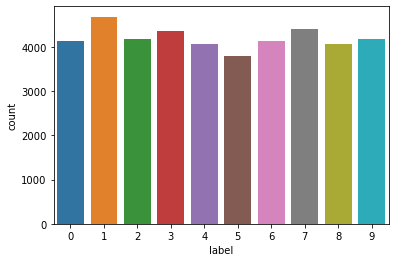

In [7]:
train_Y = trainData.iloc[:,0]
plot_dist = sb.countplot(train_Y)
plot.show(plot_dist)

Dodatkowo, wyświetlimy przykładowe rysunki cyft z pomocą biblioteki typu "matlab". Należy przekształcić tablicę z danymi uczącymi do postaci paczek 28x28:

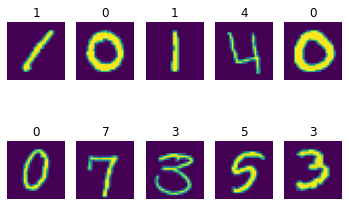

In [8]:
train_X_img = train_X.reshape(train_X.shape[0], 28, 28)
#rysujemy wykres
fig = plot.figure();
for i in range(0, 10):
    plot.subplot(2,5,(i+1))
    plot.imshow(train_X_img[i])
    plot.title(train_Y[i]);
    plot.axis('off')
plot.show()

In [9]:
print(train_X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Aktualnie nasza baza testowa posiada informację o pixelu w postaci jasności. Dlatego też do nauki znormaluzujemy bazę do postaci - jest pixel / nie ma pixela. W tym wypadku użyjemy filtru: gdy jasność pixela jest większa lub równa 128, ustawiamy pixel na 1.

In [17]:
train_X_norm = train_X

for x in range(0, train_X.shape[0] - 1):
    for y in range(0, train_X.shape[1] - 1):
        if train_X[x,y] >= 128:
            train_X_norm[x,y] = 1
        else:
            train_X_norm[x,y] = 0
train_X = trainData.iloc[:,1:].values.astype('float32')

Na dowolnym pixelu sprawdzamy czy operacja się udała:

In [19]:
print(train_X[9,320],"Przed => Po", train_X_norm[9,320])

142.0 Przed => Po 1.0


Dzielimy baze danych na dane uczące i testowe:

In [20]:
train_Image, test_Image, train_Target, test_Target = train_test_split(train_X_norm, train_Y, test_size=0.5, random_state=1)

Porównamy dla 3 modeli nauczania maszynowego : Guassian, drzewa decyzyjnego i modelu lasu losowego.

In [23]:
GaussianModel = GaussianNB()
DecisionTreeModel = tree.DecisionTreeClassifier()
RandomForestModel = RandomForestClassifier()

GaussianModel.fit(train_Image,train_Target)
DecisionTreeModel.fit(train_Image,train_Target)
RandomForestModel.fit(train_Image,train_Target) 

RandomForestClassifier()

In [ ]:
Następnie dokonujemy predykcji liczb dla danych modeli z wykorzystaniem danych testowych:

In [30]:
G_predict = GaussianModel.predict(test_Image)
D_predict = DecisionTreeModel.predict(test_Image)
F_predict = RandomForestModel.predict(test_Image)

In [32]:
Sprawdzamy skuteczność metody nauczania na podstawie procenta poprawnie odczytanych liczb:

SyntaxError: invalid syntax (<ipython-input-32-185571e40e66>, line 1)

In [31]:
print('Dokladnosc Guassian:' ,accuracy_score(G_predict, test_Target))
print('Dokladnosc model drzewa:' ,accuracy_score(D_predict, test_Target))
print('Dokladnosc model lasu:' ,accuracy_score(F_predict, test_Target))

Dokladnosc Guassian: 0.6058571428571429
Dokladnosc model drzewa: 0.829047619047619
Dokladnosc model lasu: 0.9575238095238096


Na koniec możemy zobaczyć jak radzą sobie na przykładach obrazków, zacznijmy od  Guassiana

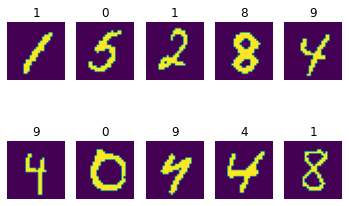

In [33]:
G_train_X_img = test_Image.reshape(test_Image.shape[0], 28, 28)
#rysujemy wykres
fig = plot.figure();
for i in range(0, 10):
    plot.subplot(2,5,(i+1))
    plot.imshow(G_train_X_img[i])
    plot.title(G_predict[i]);
    plot.axis('off')
plot.show()

Teraz DecisionTreeModel

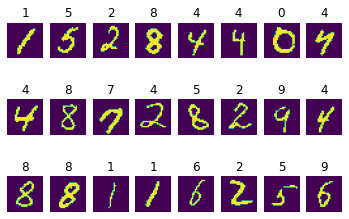

In [36]:
D_train_X_img = test_Image.reshape(test_Image.shape[0], 28, 28)
#rysujemy wykres
fig = plot.figure();
for i in range(0, 24):
    plot.subplot(3,8,(i+1))
    plot.imshow(D_train_X_img[i])
    plot.title(D_predict[i]);
    plot.axis('off')
plot.show()

In [ ]:
Na końcu najdokładniejszy RandomForestModel


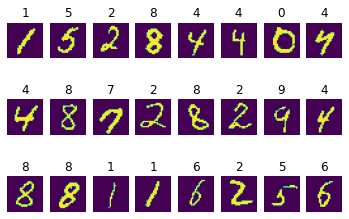

In [37]:
F_train_X_img = test_Image.reshape(test_Image.shape[0], 28, 28)
#rysujemy wykres
fig = plot.figure();
for i in range(0, 24):
    plot.subplot(3,8,(i+1))
    plot.imshow(F_train_X_img[i])
    plot.title(F_predict[i]);
    plot.axis('off')
plot.show()

Możemy zobaczyć, że na podstawie powyższych wybranych obrazków, RandomForestModel poradził sobie lepiej w dwóch więcej przypadkach w porównaniu do DecisionTreeModel. Najsłabszy okazała się metoda bazująca na algorytmie Guassiana.